# Project Objective

This analysis is to focus on the telecom customers who are dissatisfied with the services and unsubscribe them. Objective is to analyze all relevant customer data and try to find the cause of the customer attrition and the factors that impact it.

In [555]:
import pandas as pd 
from pandas import read_csv
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [556]:
filename = 'Telco-customer-churn.csv'
dataset = read_csv(filename)

In [557]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Dataset Overview:

In [558]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().any().values.sum())
print ("\nUnique values :  \n",dataset.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

In [559]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Manipulation

Total charges are shown as object type being a numerical feature of the dataset. But there was no missing values in the dataset as we have checked previously. let's check for this particular feature may have lanks to it by replacing blanks with NaN.

In [560]:
dataset[["TotalCharges"]] = dataset[["TotalCharges"]].replace(" ", np.NaN)

In [561]:
dataset[["TotalCharges"]].isnull().values.sum()
# dataset[["TotalCharges"]].isnull().sum()
# dataset[["TotalCharges"]].isnull().any().any()
# dataset[["TotalCharges"]].isnull().any().sum()

11

We have 11 missing values in the Total Charges feature. 15% of the data is missing. 

# Impute missing values:

There are only 11 missing values, all of them for the TotalCharges column. This values are actually a blank space in the csv file and are exclusive for customers with zero tenure. It's possible to concluded that they are missing due to the fact that the customer never paied anything to the company. We will impute this missing values with zero

In [562]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(np.NaN, 0).astype('float32')
dataset.info()
print("TotalCharges(Null Values): ", dataset[['TotalCharges']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float32
Churn               7043 non-null object
dtypes: float32(1), float64(1), 

In [563]:
#drop customerID 
dataset = dataset.drop('customerID',axis = 1)

# Exploratory Data Analysis

we have a binary classification problem with a slightly unbalanced target:

     Churn  Percentage
No    5174   73.463013
Yes   1869   26.536987


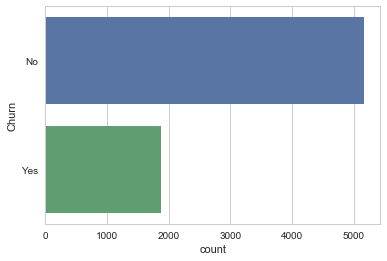

In [564]:
tempdf = pd.DataFrame(dataset['Churn'].value_counts())
tempdf["Percentage"] = (tempdf['Churn']/len(dataset)*100)

print(tempdf)

sns.countplot(y="Churn", data=dataset)

# Numerical Features Analysis

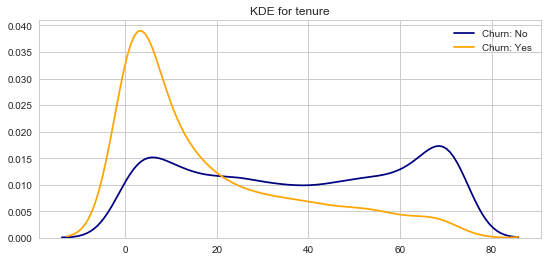

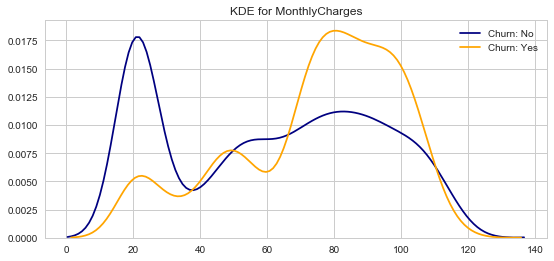

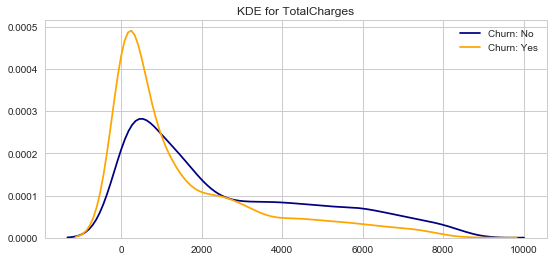

In [565]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(dataset[dataset['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(dataset[dataset['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

Tenure:

1. Not a normal distribution. Bi-Modal distribution (having 2 peaks) which means data is concentrated across two different groups

2. We have major chunk of customers in 0-1 month period in those most of the recent clients are more likely to churn. Lot of them might be cutomers who tried the service and left or liked the service and continued

3. Between 10 months to 65 months, we can see flat distribution of data.

4. We have lot customers in 69-72 months range. They are the loyal customers

5. If customer can be retained between 10-20 months, there are high chances, customer will stay very long. Churn decreases over time

Monthly Charges:

1. Not a normal distribution.Close to Bi-Modal distribution
2. Majority of customers are paying  18to 20 dollars. Must be the service charge for basic service. Majority of customers are subscribed to basic package.
3. Between  70− 100 dollars, we have quite a number of customers. They might be the ones subscribed for multiple services.
4. Clients with higher MonthlyCharges are also more likely to churn

- Tenure and MonthlyCharges are probably important features

Total Charges: 

1. Data is positively skewed.

2. Majority of the population have spent close to $1,100 dollars

3. Cutomers have spent upto $9,000 dollars



# Categorical features Analysis: 

This dataset has 16 categorical features:

- Six binary features (Yes/No)
- Nine features with three unique values each (categories)
- One feature with four unique values

# Gender and Age (SeniorCitizen)

In [566]:
dataset["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [567]:
g = dataset.groupby("SeniorCitizen")["Churn"].value_counts().to_frame()

In [568]:
axis_name="percentage of customers"
#g.rename({"Churn": axis_name}, axis=1)
g.rename({"Churn": axis_name}, axis=1).reset_index()

,SeniorCitizen,Churn,percentage of customers
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


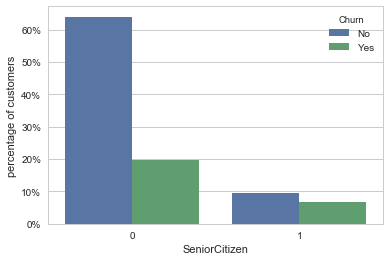

In [569]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = dataset.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(dataset)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

barplot_percentages("SeniorCitizen")


16% percent of the customers are senior citizens and 10 % of them are loyal customers,
remaining 84% pf the customers are not senior citizens and more than 60% are loyal customers.

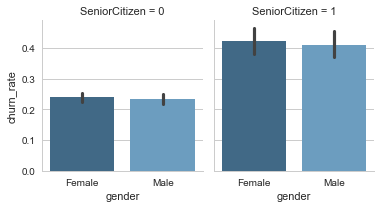

In [570]:
dataset['churn_rate'] = dataset['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(dataset, col="SeniorCitizen", aspect=.9)
g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

- Gender is not an indicative of churn, counts are almost same in either category.
- SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.

# Partner and dependents

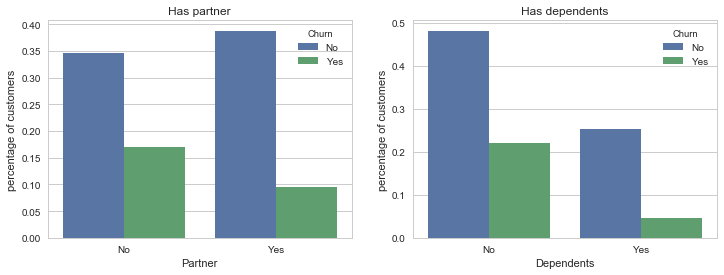

In [571]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"

# Plot Partner column
gp_partner = dataset.groupby('Partner')["Churn"].value_counts()/len(dataset)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])

# Plot Dependents column
gp_dep = dataset.groupby('Dependents')["Churn"].value_counts()/len(dataset)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

- Customers that doesn't have partners are more likely to churn
- Customers without dependents are also more likely to churn

# Phone and Internet services

There are only two main services: phone and internet but the former has many additionals like online backup and security.


# Phone services

There are only two features here: if the client has phone and if he has more than one line. Both can be summed up in one chart:

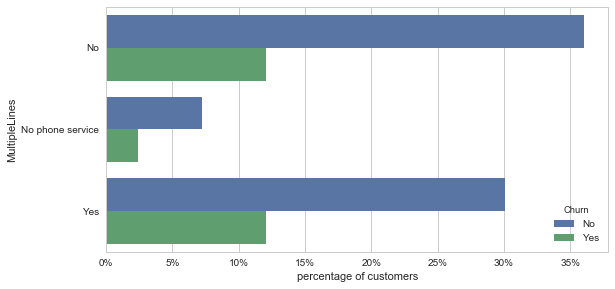

In [572]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

- Few customers doesn't have phone service
- Customers with multiple lines have a slightly higher churn rate

Let's see how multiple lines affects the monthly charges:

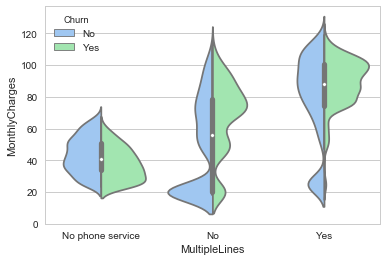

In [573]:
sns.violinplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=dataset, height=4.2, aspect=1.4)

# Internet Services

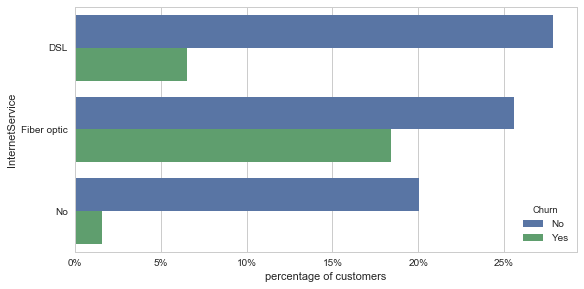

In [574]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

- Clients without internet have a very low churn rate
- Customers with fiber are more probable to churn than those with DSL connection

Comparing the Internet service with monthly charges:

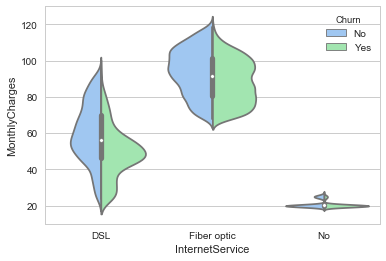

In [575]:
sns.violinplot(x="InternetService", y="MonthlyCharges", hue="Churn",
                 split=True, palette="pastel", data=dataset, height=4.2, aspect=1.4);

Customers with DSL (slower connection) and higher charges are less probable to churn. Interesting!!

# Additional services

There are six additional services for customers with internet:

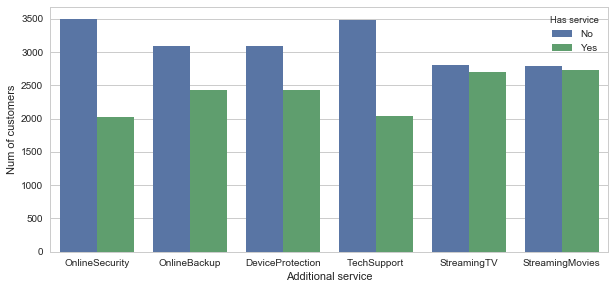

In [576]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df = pd.melt(dataset[dataset["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

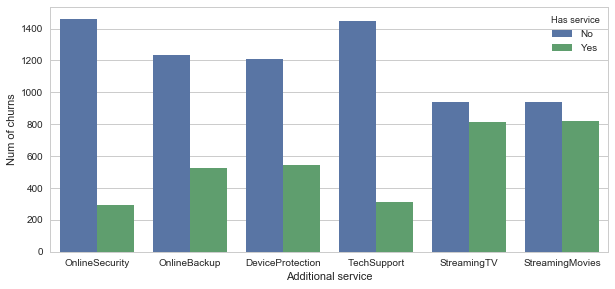

In [577]:
plt.figure(figsize=(10, 4.5))
df = dataset[(dataset.InternetService != "No") & (dataset.Churn == "Yes")]
df = pd.melt(df[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

- Customers with the first 4 additionals (security to tech support) are more unlikely to churn
- Customer not opting for TechSupport have higher chances of leaving
- Customers without device protection have likely higher chances of leaving
- Streaming service is not predictive for churn

# Contract and Payment

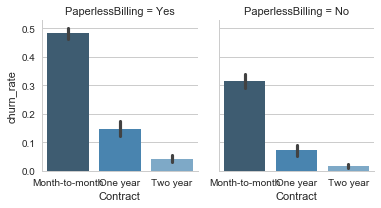

In [578]:
g = sns.FacetGrid(dataset, col="PaperlessBilling", aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

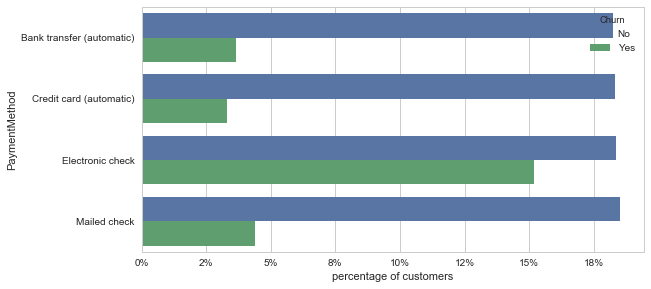

In [579]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

A few observations:

- Customers with paperless billing are more probable to churn
- The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
- Short term contracts have higher churn rates (month to Month contracts)


One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour. Now let's have a look at the relation with numerical features:

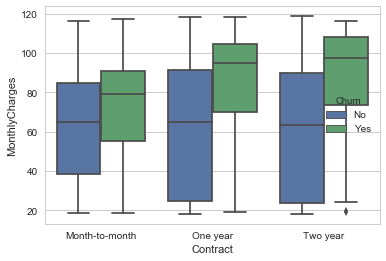

In [580]:
sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data=dataset)

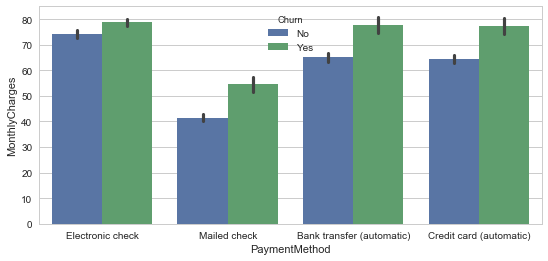

In [581]:
plt.figure(figsize=(9, 4))
sns.barplot(x="PaymentMethod", y="MonthlyCharges", hue="Churn", data=dataset)

- Longer contracts are more affected by higher monthly charges (for churn rate).
- Mailed checks have lower charges
- There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check

In [582]:
dataset.drop('churn_rate',axis=1, inplace=True)

# Correlation between features

Correlation heatmap (Pearson method)

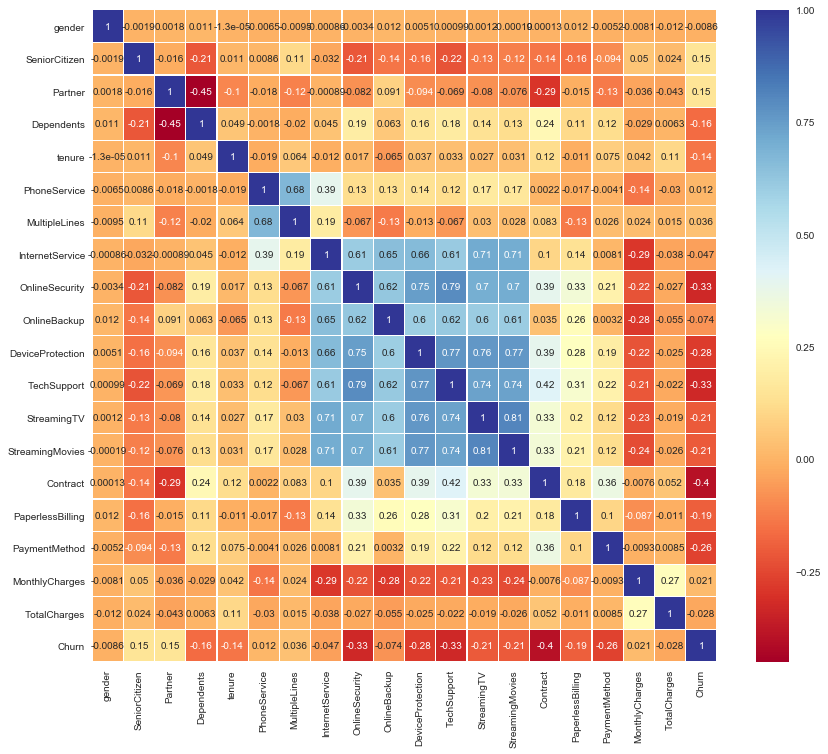

In [583]:
plt.figure(figsize=(14, 12))
corr = dataset.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="RdYlBu", annot = True)

In [584]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

# Feature Importance

To get some preliminary feature importances we will use the Random Forest classifier, an well know decision-tree based model. I've used label encode to encode the categorical features. 

In [585]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#gbank['checking_balance'] = le.fit_transform(gbank['checking_balance'])

def Encoder(a):
    le = LabelEncoder()
    x = le.fit_transform(a)
    return x

dataset[["Churn"]] = Encoder(dataset[["Churn"]])

dataset[["gender"]] = Encoder(dataset[["gender"]])
dataset[["Partner"]] = Encoder(dataset[["Partner"]])
dataset[["Dependents"]] = Encoder(dataset[["Dependents"]])
dataset[["PhoneService"]] = Encoder(dataset[["PhoneService"]])
dataset[["MultipleLines"]] = Encoder(dataset[["MultipleLines"]])
dataset[["InternetService"]] = Encoder(dataset[["InternetService"]])
dataset[["Contract"]] = Encoder(dataset[["Contract"]])
dataset[["PaperlessBilling"]] = Encoder(dataset[["PaperlessBilling"]])
dataset[["PaymentMethod"]] = Encoder(dataset[["PaymentMethod"]])

dataset[["OnlineSecurity"]] = Encoder(dataset[["OnlineSecurity"]])
dataset[["OnlineBackup"]] = Encoder(dataset[["OnlineBackup"]])
dataset[["DeviceProtection"]] = Encoder(dataset[["DeviceProtection"]])
dataset[["TechSupport"]] = Encoder(dataset[["TechSupport"]])
dataset[["StreamingTV"]] = Encoder(dataset[["StreamingTV"]])
dataset[["StreamingMovies"]] = Encoder(dataset[["StreamingMovies"]]) 

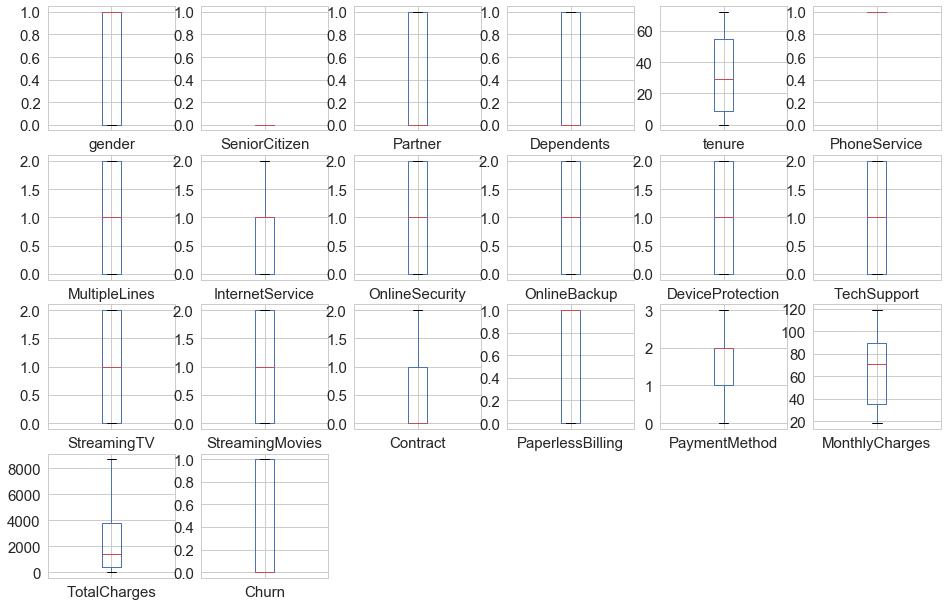

In [586]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(6,6), fontsize=15, figsize=(16,16))
plt.show()

Great!! No Outliers!! 

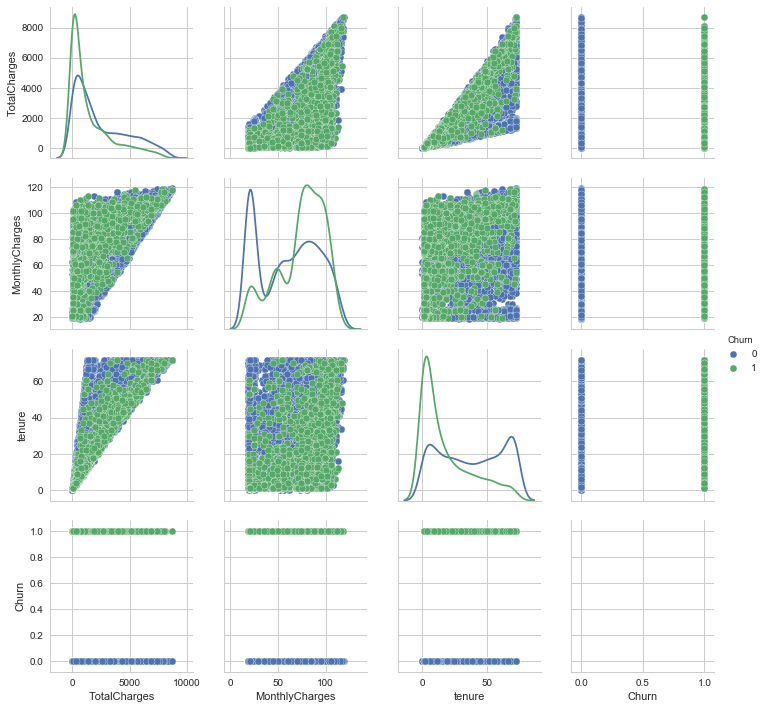

In [587]:
cols = ["TotalCharges", "MonthlyCharges", "tenure", "Churn"] 
pairplot_feature = dataset[cols]
sns.pairplot(pairplot_feature,diag_kind='kde', hue = "Churn")

In [588]:
X = dataset.drop("Churn", axis=1)
y = dataset["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
clf = RandomForestClassifier(**params).fit(X_train, y_train)

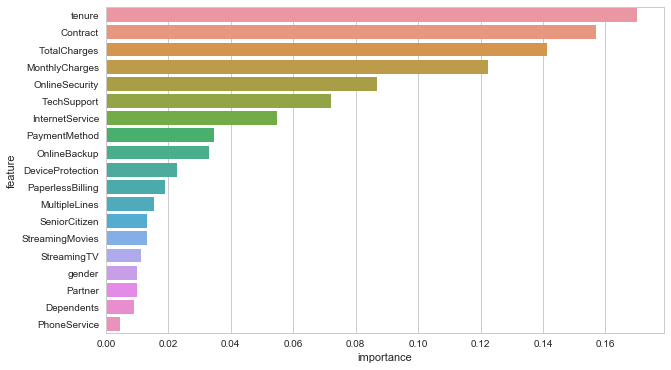

In [589]:
indices = np.argsort(clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         clf.feature_importances_[indices[f]]]

plt.figure(figsize=(10, 6))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

Summary :

- three numerical features are good predictors for churn, specially Tenure which is very much visible in the feature importance
- People with short term contracts are very much likely to churn
- customers with Fiber optic are very likely to churn
- gender and streaming are not important features as counts are almost same in either category which is very much shown in the feature importance chart


From the Heat map 

- we could infer that the additional services are highly correlated, we might consider removing "No Internet services" as it may be the cause of it and we shall try PCA on it !! Lets explore!!
